<a href="https://colab.research.google.com/github/OGharsh/Intro-to-Gen-AI-and-LLM/blob/main/Mini_Project_1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<h1><center><font size=10>Introduction to LLMs and GenAI : Basics of NLP — Text Cleaning & Vectorization</font></center></h1>

# Mini Project 1 — Sentiment Analysis of Product Reviews




## Problem Statement



### Business Context
In today’s fast-paced e-commerce landscape, customer reviews significantly shape product perception and purchasing decisions. A rise in negative sentiment, if not tracked and addressed, can cause customer churn, reputation damage, and revenue loss.



### Problem Definition
A growing e-commerce platform specializing in electronic gadgets captures customer feedback through multiple channels. With rapid customer-base growth and a surge in review volume, manual tracking is infeasible.  
**Goal:** Build an **AI model** that parses product reviews and predicts **sentiment** as **Positive / Negative / Neutral**.



## Importing the necessary libraries


In [1]:

# to read and manipulate the data
import pandas as pd
import numpy as np

# to visualize
import matplotlib.pyplot as plt
import seaborn as sns

# regular expressions for text cleaning
import re

# nltk for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# scikit-learn for ML pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

# saving model
import joblib

# display settings
pd.set_option('display.max_colwidth', 200)
sns.set_context('notebook')
print('Libraries imported successfully!')

Libraries imported successfully!



## Loading the dataset
>


In [3]:




from google.colab import files
uploaded = files.upload()
DATA_PATH = list(uploaded.keys())[0]
DATA_PATH = 'Product_Reviews.csv'
print('Set DATA_PATH to:', DATA_PATH)

Saving Product_Reviews.csv to Product_Reviews (1).csv
Set DATA_PATH to: Product_Reviews.csv


In [5]:

try:
    reviews = pd.read_csv(DATA_PATH)
except Exception as e:
    print('Error reading CSV at', DATA_PATH, '\n', e)
    raise

data = reviews.copy()
print('Shape:', data.shape)
data.head()

Shape: (1007, 3)


,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage....",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Bra...",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years o...",POSITIVE
4,AVpe7AsMilAPnD_xQ78G,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Apple or in this case, Amazon. I like having devices on which I can put anything I want and use it. But....",POSITIVE



## Data Overview


In [6]:

display(data.head())
print('\nInfo:')
print(data.info())
print('\nNull values per column:')
print(data.isnull().sum())


print('\nUnique sentiments:', data['Sentiment'].unique())

,Product ID,Product Review,Sentiment
0,AVpe7AsMilAPnD_xQ78G,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage....",POSITIVE
1,AVpe7AsMilAPnD_xQ78G,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Bra...",POSITIVE
2,AVpe7AsMilAPnD_xQ78G,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,POSITIVE
3,AVpe7AsMilAPnD_xQ78G,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years o...",POSITIVE
4,AVpe7AsMilAPnD_xQ78G,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Apple or in this case, Amazon. I like having devices on which I can put anything I want and use it. But....",POSITIVE



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      1007 non-null   object
 1   Product Review  1007 non-null   object
 2   Sentiment       1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB
None

Null values per column:
Product ID        0
Product Review    0
Sentiment         0
dtype: int64

Unique sentiments: ['POSITIVE' 'NEUTRAL' 'NEGATIVE']



## Exploratory Data Analysis (EDA)
- Class distribution of sentiments  
- Example reviews by sentiment


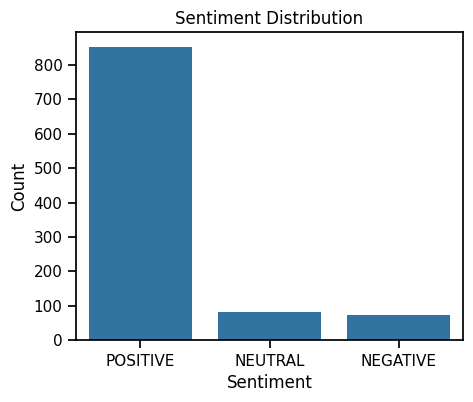

In [7]:

plt.figure(figsize=(5,4))
sns.countplot(x='Sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [8]:

for s in data['Sentiment'].unique():
    print(f'\n=== Examples for: {s} ===')
    examples = data[data['Sentiment'] == s]['Product Review'].dropna().head(3)
    for i, ex in enumerate(examples, 1):
        print(f'{i}.', ex)


=== Examples for: POSITIVE ===
1. I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, 


## Text Preprocessing
We will:
1. Lowercase text  
2. Remove URLs, HTML tags, non-alphabetic characters, extra spaces  
3. Remove stopwords  
4. Apply **stemming** or **lemmatization** (choose one)


In [10]:

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

STOPWORDS = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text, do_stem=False, do_lemma=True):
    if not isinstance(text, str):
        text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', ' ', text)
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = [w for w in text.split() if w not in STOPWORDS]
    if do_stem:
        tokens = [stemmer.stem(w) for w in tokens]
    if do_lemma:
        tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return ' '.join(tokens)


data['clean_review'] = data['Product Review'].astype(str).apply(clean_text)
data[['Product Review', 'clean_review']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Product Review,clean_review
0,"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage....",initially trouble deciding paperwhite voyage review less said thing paperwhite great spending money go voyage fortunately friend owned ended buying paperwhite basis model ppi dollar jump turn pric...
1,"Allow me to preface this with a little history. I am (was) a casual reader who owned a Nook Simple Touch from 2011. I've read the Harry Potter series, Girl with the Dragon Tattoo series, 1984, Bra...",allow preface little history casual reader owned nook simple touch read harry potter series girl dragon tattoo series brave new world key title fair say nook get much use many others may gotten fa...
2,I am enjoying it so far. Great for reading. Had the original Fire since 2012. The Fire used to make my eyes hurt if I read too long. Haven't experienced that with the Paperwhite yet.,enjoying far great reading original fire since fire used make eye hurt read long experienced paperwhite yet
3,"I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years o...",bought one first paperwhites pleased constant companion suppose ive read average book every three day past however many year wouldnt give youd pry cold dead finger sundry logistical reason ive als...
4,"I have to say upfront - I don't like coroporate, hermetically closed stuff like anything by Apple or in this case, Amazon. I like having devices on which I can put anything I want and use it. But....",say upfront like coroporate hermetically closed stuff like anything apple case amazon like device put anything want use fairly happy user nook touch several year use functionality since live serbi...
5,"Had older model, that you could text to speech, this one hasn't. Liked the smaller size, but having to buy a different cover! Still getting used to shelf quite different from my 4 year old model.P...",older model could text speech one liked smaller size buy different cover still getting used shelf quite different year old model paper white nice reading
6,"This is a review of the Kindle Paperwhite launched July 2015. Essentially. the same as the previous Kindle Paperwhite but with a fantastic upgraded (300 dpi) screen, more memory and storage it's a...",review kindle paperwhite launched july essentially previous kindle paperwhite fantastic upgraded dpi screen memory storage terrific reading device review aim describe product compare kindle device...
7,"I love my kindle! I got one for my fiance on his birthday, he loved it!!!!!!! so I decided to get one for myself as well and I am glad I did. It is very easy to read books in it. I LOVE the dictio...",love kindle got one fiance birthday loved decided get one well glad easy read book love dictionary little device normally skip word know meaning try guess mean context kindle press hold finger wor...
8,"Vraiment bon petit appareil , lger et facile d emploiJ ai hte de m en servir sur les plages cet hiverBelle bibliothque de livres disponiblesBon achat en bref",vraiment bon petit appareil lger et facile emploij ai hte de en servir sur le plage cet hiverbelle bibliothque de livres disponiblesbon achat en bref
9,"Exactly what it is supposed to be. Works great and I love the built-in light. Perfect reader, and very quick delivery.",exactly supposed work great love built light perfect reader quick delivery



## Text Vectorization
We will compare two popular vectorizers:
- **CountVectorizer** (Bag of Words)
- **TfidfVectorizer** (Term Frequency–Inverse Document Frequency)



## Train–Test Split


In [11]:

X = data['clean_review'].fillna('')
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print('Train size:', X_train.shape[0], ' Test size:', X_test.shape[0])

Train size: 805  Test size: 202



## Model Building — Using **CountVectorizer**
We will train three classic ML models:
- **Multinomial Naive Bayes**  
- **Logistic Regression**  
- **Linear SVM (LinearSVC)**


In [12]:

pipelines_count = {
    'NB_Count': Pipeline([('vect', CountVectorizer()), ('clf', MultinomialNB())]),
    'LR_Count': Pipeline([('vect', CountVectorizer()), ('clf', LogisticRegression(max_iter=200))]),
    'SVM_Count': Pipeline([('vect', CountVectorizer()), ('clf', LinearSVC())])
}

results_count = {}

for name, pipe in pipelines_count.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    p, r, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)
    results_count[name] = {'Accuracy': acc, 'Precision': p, 'Recall': r, 'F1': f1}

pd.DataFrame(results_count).T.sort_values('F1', ascending=False)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Accuracy,Precision,Recall,F1
LR_Count,0.876238,0.854415,0.876238,0.846088
SVM_Count,0.861386,0.838504,0.861386,0.834574
NB_Count,0.866337,0.845226,0.866337,0.832107



## Model Building — Using **TF-IDF**
Same models with TF-IDF features.


In [13]:

pipelines_tfidf = {
    'NB_TFIDF': Pipeline([('vect', TfidfVectorizer()), ('clf', MultinomialNB())]),
    'LR_TFIDF': Pipeline([('vect', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=200))]),
    'SVM_TFIDF': Pipeline([('vect', TfidfVectorizer()), ('clf', LinearSVC())])
}

results_tfidf = {}

for name, pipe in pipelines_tfidf.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    acc = accuracy_score(y_test, preds)
    p, r, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted', zero_division=0)
    results_tfidf[name] = {'Accuracy': acc, 'Precision': p, 'Recall': r, 'F1': f1}

pd.DataFrame(results_tfidf).T.sort_values('F1', ascending=False)

,Accuracy,Precision,Recall,F1
SVM_TFIDF,0.881188,0.895811,0.881188,0.847460
LR_TFIDF,0.851485,0.799394,0.851485,0.787584
NB_TFIDF,0.846535,0.716621,0.846535,0.776179



## Model Comparison and Selection
We compare all six models and pick the best based on **F1-score**.


In [14]:

all_results = {**results_count, **results_tfidf}
results_df = pd.DataFrame(all_results).T.sort_values('F1', ascending=False)
best_name = results_df.index[0]
print('Best model by weighted F1:', best_name)
results_df

Best model by weighted F1: SVM_TFIDF


,Accuracy,Precision,Recall,F1
SVM_TFIDF,0.881188,0.895811,0.881188,0.847460
LR_Count,0.876238,0.854415,0.876238,0.846088
SVM_Count,0.861386,0.838504,0.861386,0.834574
NB_Count,0.866337,0.845226,0.866337,0.832107
LR_TFIDF,0.851485,0.799394,0.851485,0.787584
NB_TFIDF,0.846535,0.716621,0.846535,0.776179


Classification Report:

              precision    recall  f1-score   support

    NEGATIVE       1.00      0.20      0.33        15
     NEUTRAL       1.00      0.25      0.40        16
    POSITIVE       0.88      1.00      0.93       171

    accuracy                           0.88       202
   macro avg       0.96      0.48      0.56       202
weighted avg       0.90      0.88      0.85       202



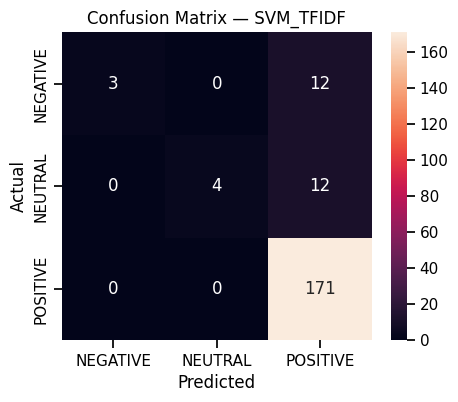

In [15]:

best_pipeline = pipelines_count.get(best_name) or pipelines_tfidf.get(best_name)
preds = best_pipeline.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, preds, zero_division=0))

cm = confusion_matrix(y_test, preds, labels=sorted(y.unique()))
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix — {best_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Save the Best Model (Optional)
This saves the trained pipeline (preprocessing + vectorizer + classifier) so it can be reused later.


In [16]:

joblib.dump(best_pipeline, 'best_sentiment_model.joblib')
print('Saved: best_sentiment_model.joblib')

Saved: best_sentiment_model.joblib



## Prediction Demo
Type any custom review to predict its sentiment using the **best model**.


In [17]:

sample_reviews = [
    "Absolutely fantastic product! Exceeded my expectations.",
    "It's okay, does the job but nothing special.",
    "Terrible quality. Broke after one day of use."
]

for txt in sample_reviews:
    cleaned = clean_text(txt)
    pred = best_pipeline.predict([cleaned])[0]
    print(f'Review: {txt}\nPredicted Sentiment: {pred}\n')

Review: Absolutely fantastic product! Exceeded my expectations.
Predicted Sentiment: POSITIVE

Review: It's okay, does the job but nothing special.
Predicted Sentiment: POSITIVE

Review: Terrible quality. Broke after one day of use.
Predicted Sentiment: NEGATIVE




## Conclusion
- We built a complete sentiment analysis pipeline for e-commerce product reviews.  
- We performed **EDA**, **text cleaning**, **vectorization**, and trained **NB / LR / SVM** models with both **CountVectorizer** and **TF-IDF**.  
- We compared models by **weighted F1-score**, inspected a **confusion matrix**, and demonstrated predictions.  

**Business Impact:** The chosen model can automatically triage customer feedback (Positive / Negative / Neutral), allowing teams to prioritize negative items, address pain points, and improve customer experience and retention.
